Batch-A12

A model to predict customer churn for a subscription-
based service or business.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
sns.set(font_scale=2)

In [89]:
#importing the dependencies

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [90]:
#evaluation metrics

from sklearn.metrics import precision_score,recall_score,f1_score,classification_report
from yellowbrick.classifier import DiscriminationThreshold,PrecisionRecallCurve

In [91]:
#reading the data
data=pd.read_csv('/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [96]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [97]:
dataset= data.drop(columns = ['RowNumber','CustomerId','Surname'])
dataset.info()
dataset['Gender'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


array(['Female', 'Male'], dtype=object)

<Axes: ylabel='Frequency'>

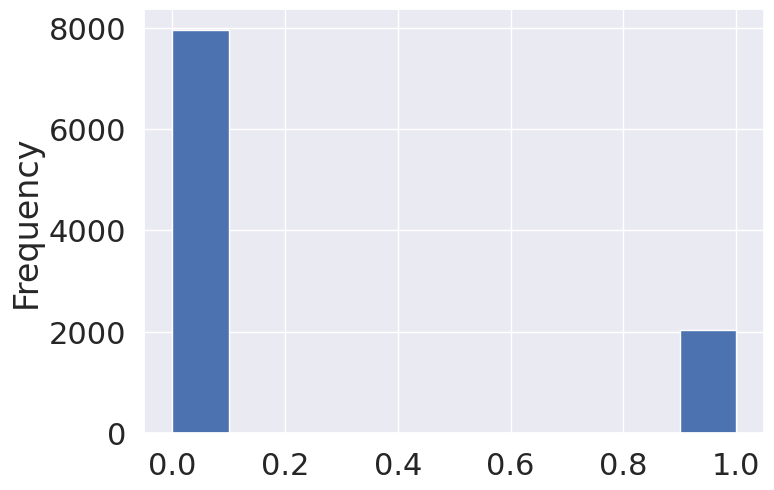

In [98]:
dataset['Gender'].unique()
dataset= pd.get_dummies(data=dataset,drop_first=True)
dataset

dataset.Exited.plot.hist()

In [102]:
print((dataset.Exited==0).sum())
print((dataset.Exited==1).sum())

7963
2037


<Axes: title={'center': 'Correlated with Exited Column'}>

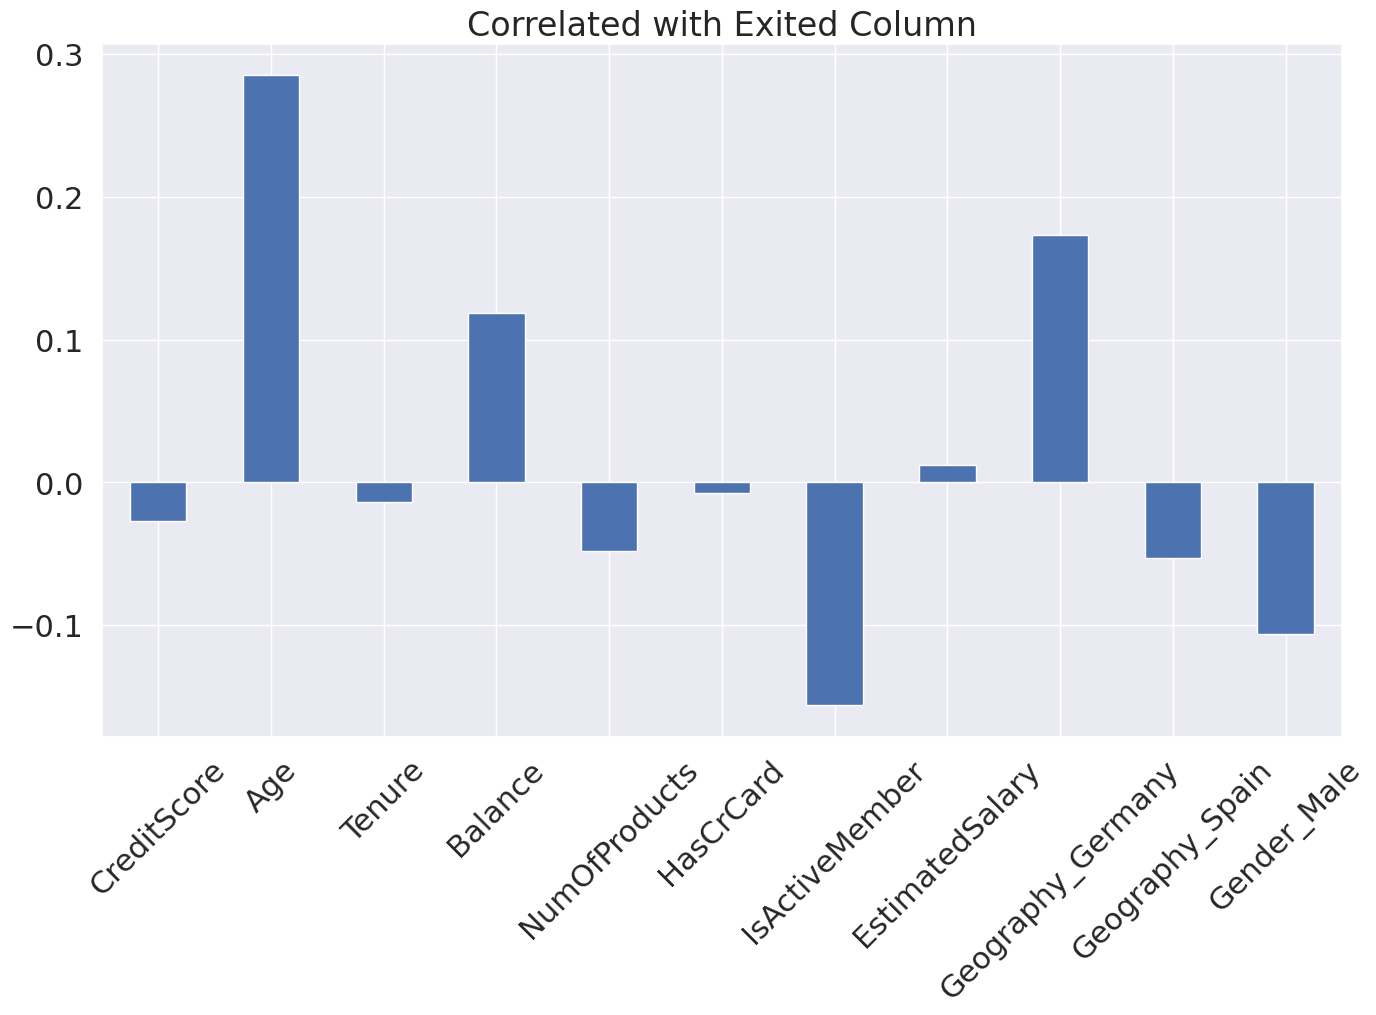

In [103]:
dataset_2=dataset.drop(columns='Exited')
dataset_2.corrwith(dataset['Exited']).plot.bar(figsize=(16,9), title='Correlated with Exited Column', rot = 45,grid = True)

<Axes: >

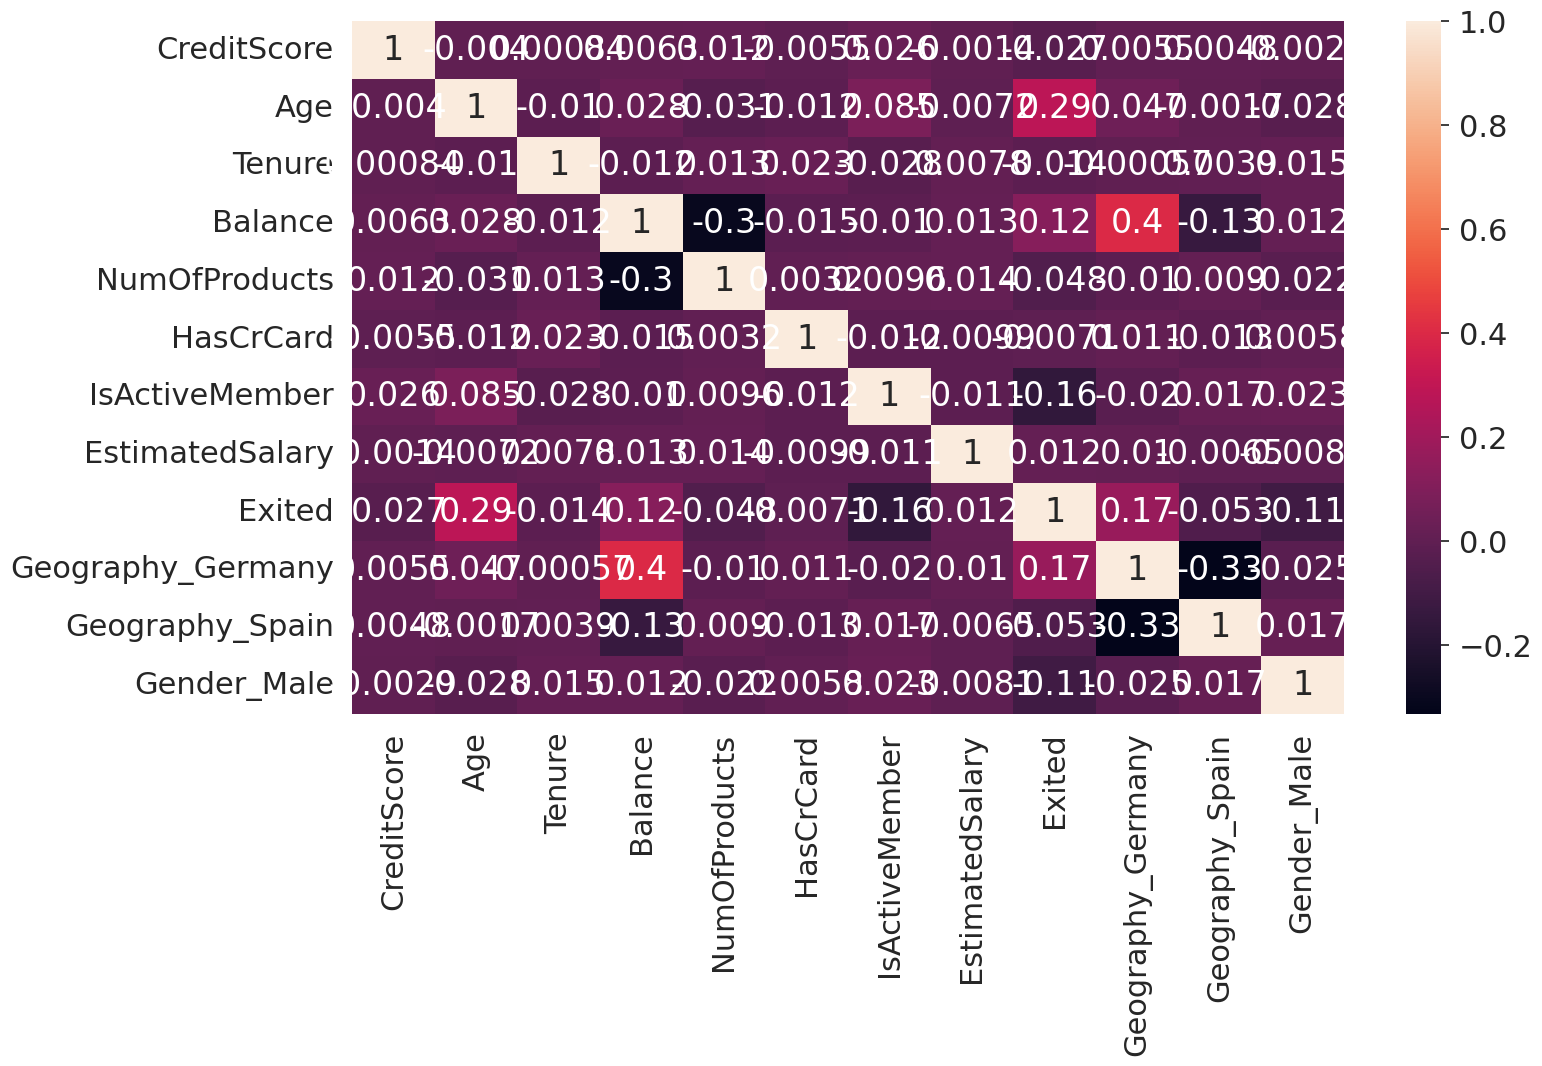

In [105]:
corr=dataset.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

In [106]:
X= dataset.drop(columns='Exited')
y= dataset['Exited']

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [108]:
X_test.shape

(2000, 11)

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [110]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred= clf.predict(X_test)

In [111]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

results=pd.DataFrame([['Logistic regression',acc,f1,prec,rec]],columns=['Model','Accuracy','F1','Precision','Recall'])
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic regression,0.811,0.336842,0.581818,0.237037


In [120]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_pred= clf.predict(X_test)
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
RF_results=pd.DataFrame([['Random Forest Classifier',acc,f1,prec,rec]],columns=['Model','Accuracy','F1','Precision','Recall'])
results.append(RF_results,ignore_index=True)
results
print(confusion_matrix(y_test,y_pred))


[[1523   72]
 [ 194  211]]


<ipython-input-120-d82cf1707225>:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [119]:
single_obs=[[647,40,3,85000.45,2,0,0,92012.45,0,1,1]]
prediction = clf.predict(scaler.fit_transform(single_obs))

if prediction == 0:
    print('Customer will be staying with the bank')
else:
    print('Customer will be leaving the bank')

Customer will be staying with the bank
